# Data Challenge - Nubank 
- Rafael Bicudo Rosa
- 25/10/2018

### Introdução

Este projeto é parte integrante da competição organizada pela Udacity com o intuito de simular um problema real de Data Science providos por empresas data driven. Neste caso, dados fornecidos pela Nubank, muito similares aos encontrados em sua base de clientes, serão usados para resolver dois problemas de negócio da empresa: o risco de de defaut de crédito e a estimativa de limite de crédito inicial. 

Os dados em si são compostos de 3 tabelas: informações quantitativas e qualitativas sobre os clientes e seu histórico financeiro disponível - nome, renda, documentos, informações demográficas, redes sociais, canal de captação, dentre outros; e histórico de gastos desses mesmos - obervações mensais de seus gastos em relação ao limite, além de outros informações relacionadas ao uso do produto; e, por fim, uma tabela idêntica à primeira para usar de teste e submissão dos resultados.

A abordagem será dividida em etapas descritas ao longo dos títulos subsequentes, mas, em resumo, serão abrangidas a abertura, limpeza, exploração e modelagem dos dados.

# Abertura dos arquivos

Configurações e pacotes iniciais para começar a exploração.

In [492]:
import pandas as pd
import numpy as np
import seaborn as sns
import gc
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') 

In [493]:
# Ajuda a otimizar o uso da memória
gc.enable()

Função para resumir principais informações preliminares do dataframe.

In [494]:
def summary_info_df (df):
# Printa diversos informações referentes ao df
    print ("Rows     : " ,df.shape[0])
    print ("Columns  : " ,df.shape[1]) 
    print ("\nFeatures : \n" ,df.columns.tolist()) #
    print ("\nMissing values :  ", df.isnull().sum().values.sum())
    print ("\nUnique values :  \n",df.nunique()) 
    print ("\nData Types :  \n",df.dtypes) 

Abertura, vizualização preliminar e call da função no 1o arquivo.

In [495]:
acquisition = pd.read_csv('data/acquisition_train.csv')
acquisition.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [496]:
summary_info_df(acquisition)

Rows     :  45000
Columns  :  43

Features : 
 ['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'email', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_first_name', 'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud']

Missing values :   219437

Unique values :  
 ids                                                 45000
target_

Abertura, vizualização preliminar e call da função no 2o arquivo.

In [497]:
spend = pd.read_csv('data/spend_train.csv')
spend.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs
0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00
2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00
3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55
4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89


In [498]:
summary_info_df(spend)

Rows     :  980818
Columns  :  7

Features : 
 ['ids', 'credit_line', 'month', 'spends', 'revolving_balance', 'card_request', 'minutes_cs']

Missing values :   0

Unique values :  
 ids                   45000
credit_line           14079
month                    36
spends               277283
revolving_balance     70195
card_request              2
minutes_cs             2130
dtype: int64

Data Types :  
 ids                   object
credit_line            int64
month                  int64
spends               float64
revolving_balance    float64
card_request           int64
minutes_cs           float64
dtype: object


Abertura, vizualização preliminar e call da função no 3o arquivo.

In [499]:
teste = pd.read_csv('data/acquisition_test.csv')

In [500]:
summary_info_df(teste)

Rows     :  19592
Columns  :  41

Features : 
 ['ids', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'email', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_first_name', 'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 'shipping_zip_code', 'profile_tags', 'user_agent']

Missing values :   74559

Unique values :  
 ids                                                 19592
score_1                                   

Como visto acima, os dados possuem muitas transformações necessárias para conseguir fazer análise plena em todas as variáveis, como trnasformações dos dtypes, ajuste de categóricas, variáveis sem muita informação. Começarei com isso abaixo.

# Data Cleaning

Como os dados de acquisition e teste possuem a mesma estrutura, realizarei as transformações necessárias de forma conjunta para evitar inconsistências. Iniciarei com o reagrupamento dos dados em estruturas mais organizadas para, em seguida, realizar essas transformações como tratamento das variáveis missing, categóricas, dentre outros abaixo.

### Modificações Preliminares

Reagrupamento dos dados em variáveis explicativas e resposta.

In [501]:
# separação das variáveis preditoras nos dados de treino
acquisition_X = acquisition.iloc[:, 2:-1].copy()

# separação das variáveis resposta dos dados de treino
acquisition_y = acquisition[['target_default']].copy()
fraud_y = acquisition[['target_fraud']].copy()

# separação das variáveis preditoras nos dados de teste e formação do combo set
teste_X = teste.iloc[:, 1:].copy()
combo_X = pd.concat([acquisition_X, teste_X])
combo_X.describe() 

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,63807.000000,64592.000000,64592.000000,64592.000000,63807.000000,21643.000000,21643.000000,44839.000000,6.380700e+04,26554.000000,...,63807.000000,48141.000000,64592.000000,32200.0,64592.00000,42849.000000,61366.000000,64592.000000,6.459200e+04,64592.000000
mean,348.031877,99.997870,0.499220,99.942719,0.296404,13811.507536,41.798457,34562.007560,7.180972e+04,35.174249,...,10.681164,11.044847,247.296709,0.0,1.49712,0.503209,12.424127,501.065674,inf,33930.017773
std,110.064626,3.170869,0.288769,10.034220,0.101549,8078.113639,10.273546,37041.867093,5.124993e+04,21.663679,...,4.583902,4.576030,146.073105,0.0,1.11553,0.499996,126.854506,288.673565,NaN,12680.019853
min,0.000000,86.191572,0.000035,60.663039,0.000000,730.050000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,-999.000000,0.000000,4.030000e+02,12001.000000
25%,270.000000,97.858659,0.250295,93.210322,0.220000,7524.980000,36.000000,10000.000000,4.501336e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.00000,0.000000,11.000000,251.000000,5.079850e+04,22959.000000
50%,340.000000,100.006042,0.498237,99.975654,0.290000,12024.210000,36.000000,25775.000000,6.139916e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,1.00000,1.000000,27.000000,503.000000,1.017605e+05,33844.500000
75%,420.000000,102.131648,0.749190,106.698884,0.360000,19218.025000,36.000000,47326.500000,8.602645e+04,50.000000,...,13.000000,14.000000,374.000000,0.0,2.00000,1.000000,43.000000,750.000000,1.513790e+05,44911.000000
max,990.000000,113.978234,0.999982,142.430069,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.00000,1.000000,59.000000,1000.000000,inf,56000.000000


Como visto acima, talvez por erro de extração na origem, ou qualquer outro motivo, a coluna "reported_income" possui valores inf, assim eliminá-los será a primeira conduta.

In [502]:
combo_X.reported_income.replace([np.inf, -np.inf], np.nan, inplace = True)

Variáveis descartadas por não terem informação facilmente obtíveis, ou conseguidas via outras variáveis. Poderiam ser melhor trabalhadas em outra oportunidade: lat_lon (poderia dar origem a 2 features novas para realização de clusterização, ou analisar a interação quantitativa da região), application_time_applied (se se entendesse a raiz do problema com horários com 60 min, deixarei o código disponível abaixo), external_data_provider_first_name (NLP, embora a maioria dos nomes não se repita).

In [443]:
#from datetime import datetime
#datetime.strptime(acquisition.application_time_applied, '%H:%M:%S')
#acquisition.application_time_applied = acquisition.application_time_applied.map(lambda x: datetime.strptime(x, '%H:%M:%S'))
# valores como 00:60:02 inviabilizam o rolê

In [504]:
# Variáveis com pouca informação, ou de difícil obtenção
discVars = [
    'zip', 'job_name', 'lat_lon', 'profile_phone_number', 
    'application_time_applied','shipping_zip_code', 'profile_tags', 'user_agent', 
    'reason', 'external_data_provider_first_name'
]

#visualização das acima descritas
combo_X[discVars].head()

,zip,job_name,lat_lon,profile_phone_number,application_time_applied,shipping_zip_code,profile_tags,user_agent,reason,external_data_provider_first_name
0,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-29.151545708122246, -51.1386461804385)",514-9840782,07:52:34,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,leidelaura
1,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-19.687710705798963, -47.94151536525154)",251-3659293,02:34:29,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,diocezio
2,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-28.748023890412284, -51.867279334353995)",230-6097993,00:60:02,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,veralucia
3,Cc/kWDLQH3dpHv5HU+pLVA==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,"(-17.520650158450454, -39.75801139933186)",261-3543751,11:20:49,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,venice
4,i036nmJ7rfxo+3EvCD7Jnw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,"(-16.574259446978008, -39.90990074785962)",102-3660162,13:39:03,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,darzisa


Colunas com apenas 1 valor também serão excluídas por não possuírem informação.

In [505]:
noVar = [feature for feature in combo_X.columns if combo_X[feature].nunique() == 1]
noVar

['channel', 'external_data_provider_credit_checks_last_2_year']

Exlusões propriamente ditas. Vale ressaltar que reseto o index para fazer a manutenção do original como coluna, e conseguir fazer manipulações pelo número de linhas.

In [506]:
# Exclusão dsa variáveis citadas
combo_X.drop(discVars, axis = 1, inplace = True)
combo_X.drop(noVar, axis = 1, inplace = True)

# renovação do index
combo_X.reset_index(drop = True, inplace=True)

### Missing Values

A partir da utilização do pacote missingno, farei a seguir um estudo do aparecimento dos NaN na amostra, a partir de uma série de plotagens, para melhor entender suas ocorrências e a qual abordagem para cada.

In [507]:
# Pacote necessário à análise
import missingno as msno

Variáveis target.

In [508]:
# Criação do objeto somente com variáveis targets
target = acquisition[['target_default', 'target_fraud']].copy()
# Colunas com missing values
missingValue = target.columns[target.isnull().any()].tolist()
# DF das variáveis com NaN
target_null = target[missingValue]

Plot da ocorrência de Missing Values. Ele é interessante por demonstrar quantos dados missing aparecem na amostra em relação à densidade, e a quantidade absoluta de valores de fato por variável.

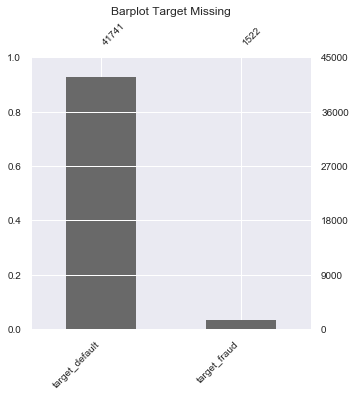

In [509]:
# Plot
msno.bar(
    target_null,figsize=(5,5),fontsize=10,labels=True # parâmetros estéticos
);
# Título
plt.title('Barplot Target Missing');

Há valores faltantes em ambas, no entanto o próprio enunciado do exercício explicitou que os valores faltantes em target_fraud são considerados bons pagadores, ou seja, uma 3a classe, assim procederei à correção desta e, pela sua baixa representatividade, à criação de um index para ser usado nos modelos de treinamento de qualidade de crédito. 

In [510]:
# index das observações com NaN em target_default
acq_idx = acquisition_y.loc[acquisition_y.target_default.isnull(), :].index
# replace na variável target_fraud
fraud_y.target_fraud.replace(np.nan, 'bom', inplace = True)

Variáveis explicativas.

In [511]:
# Colunas com missing values
missingValueColumns = combo_X.columns[combo_X.isnull().any()].tolist()
# DF das variáveis com NaN
combo_X_null = combo_X[missingValueColumns] 

Plot da ocorrência de Missing Values nos dados com o mesmo formato usado acima.

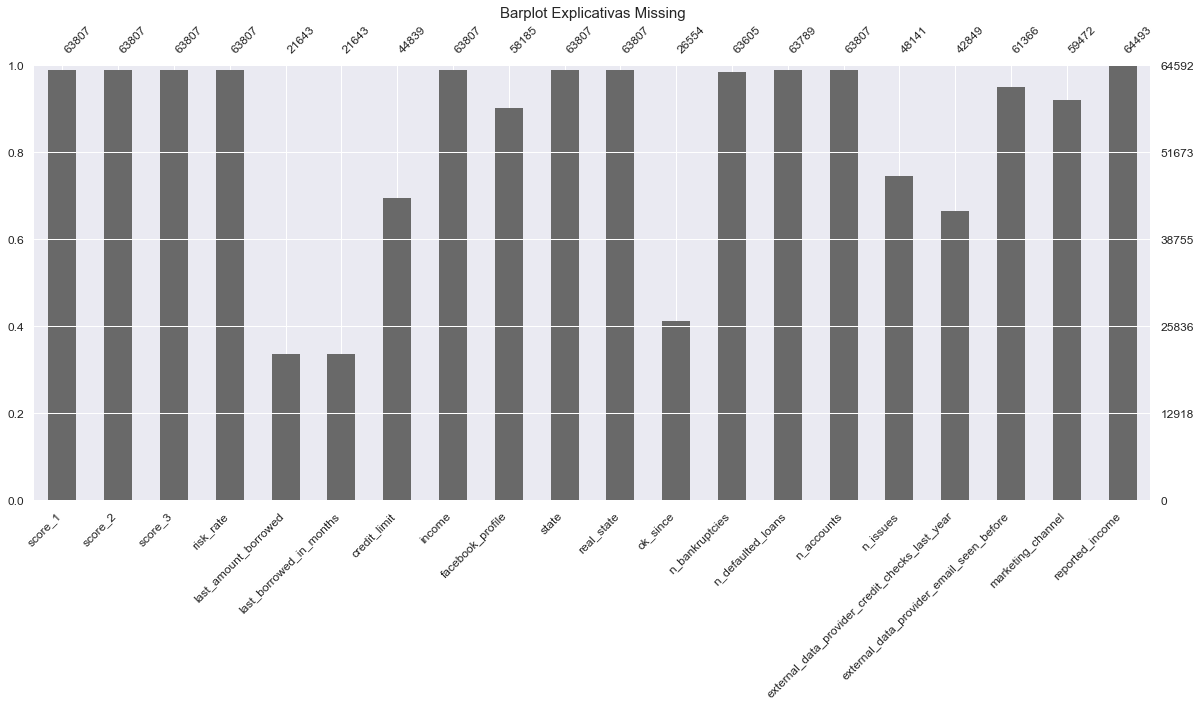

In [512]:
msno.bar(
    combo_X_null,figsize=(20,8),fontsize=12,labels=True # parâmetros estéticos
);
# Título
plt.title('Barplot Explicativas Missing',fontsize=15);

Em seguida, farei um correlograma para analisar se há alguma correlação no não aparecimento dos valores.

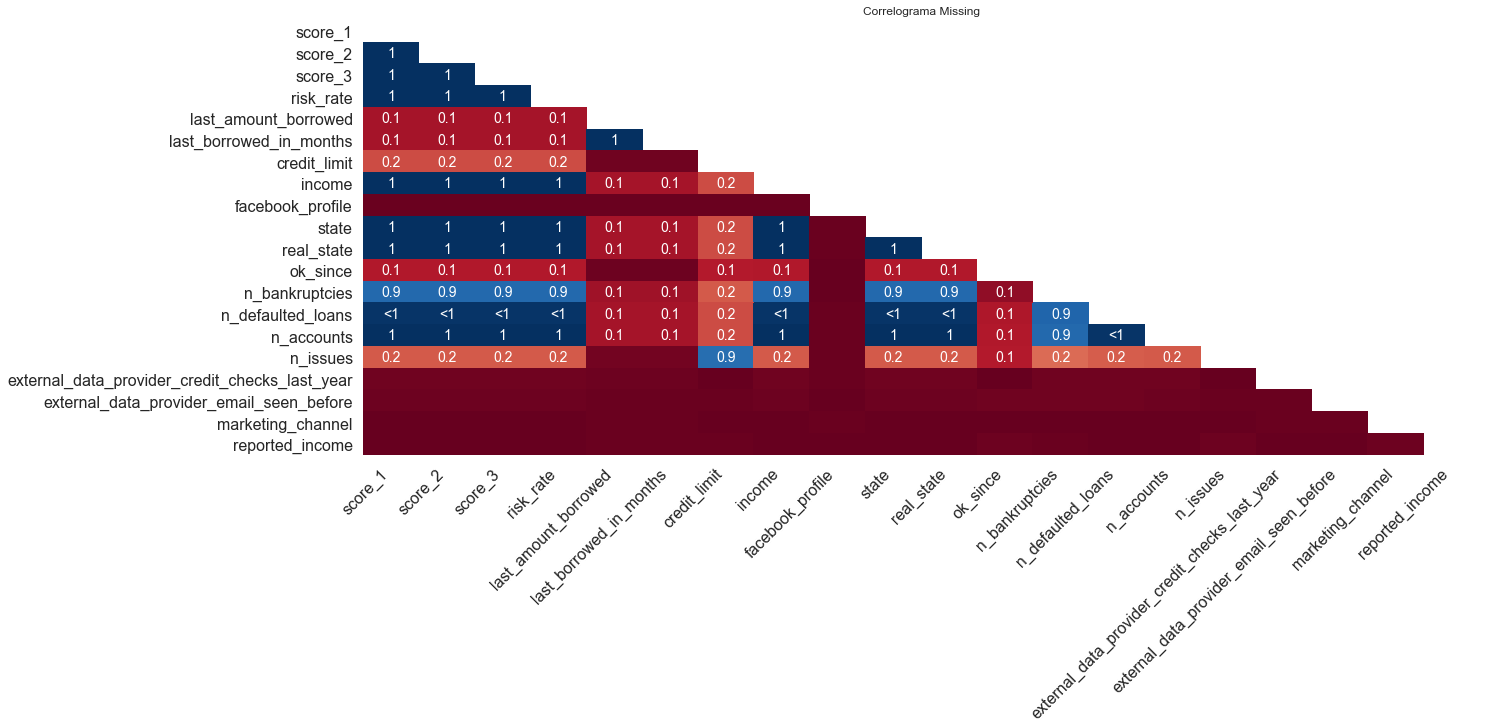

In [513]:
# Plot
msno.heatmap(combo_X_null,figsize=(20,8));
# Título
plt.title('Correlograma Missing');

Ao observar os dados acima, percebe-se que as variáveis perfeitamente correlacionadas possuem, também, baixa representatividade na amostra (0.01%) como constatado no barplot do início, assim optarei pela exclusão dessas observações do modelo de treino, e imputação quando nos dados de teste.

In [514]:
# Loop para dropagem dos dados missing totalmente corelacionados
idMis = acquisition.loc[acquisition.score_1.isnull(), :].index.tolist() # uso o index do df original para não alterar o teste
for df in [combo_X, acquisition_y, fraud_y]:
    df = df.drop(idMis, inplace=True) # tava dando bug, entao igualei para garantir que nao vai dar pau


# Reset do index para garantir grupos de treino e teste no modelo    
combo_X.reset_index(inplace=True)

Demais ações em relação aos outros missings

Protocolo:
- menor 0.5: ou serão alteradas, ou descartadas
- maior 0.5: amostra considerável para se realizar imputação se númerica. No caso das categóricas, considerarei NaN como categoria à parte

Ações diferenciadas:
- last_amount_borrowed, last_borrowed_in_months, ok_since: como os dados são referentes a ações que poderiam ou não acontecer, e não há zeros na amostra, assumirei que os NaN são zeros (não tomaram)

In [515]:
# for loop para substituição de NaN's por 0 nas features mencionadas acima
for time_f in ['last_amount_borrowed', 'last_borrowed_in_months', 'ok_since']:
    combo_X[time_f].replace(np.nan, 0, inplace = True)

Agora, acontecerá a análise da distribuição das variáveis numéricas faltantes para decidir o melhor método de imputação para cada uma. Para conseguir isso, refarei o df das features com valores faltantes só incluindo as numéricas. Com o intuito de não misturar os métodos, usarei 2 list comprehensions para separar as features numéricas e categóricas com o auxílio do pacote 're' para uso do Regex.

In [516]:
# Pacote para uso do regex
import re 

# List comprehension para separar features categóricas
catFeatures = [
feature for feature in combo_X.columns if len(combo_X[feature].unique()) <= 51 and  not bool(re.search("^n_", feature))
]

# List comprehension para determinar numéricas
numFeatures = [feature for feature in combo_X.columns.tolist() if feature not in catFeatures]

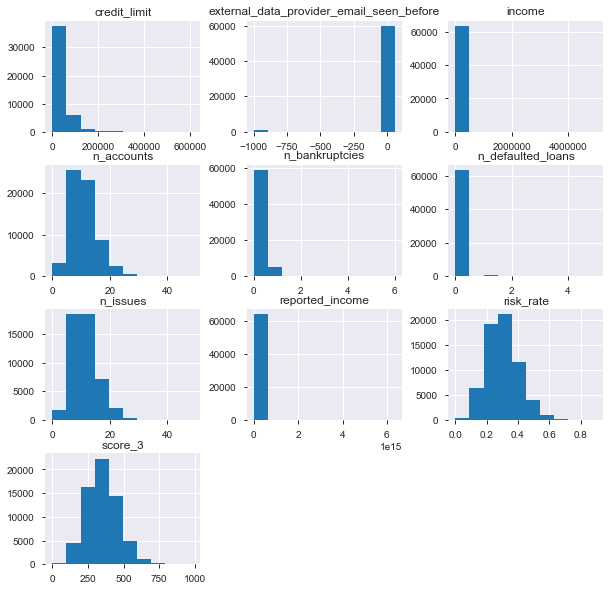

In [517]:
# Nova lista de features com valores NaN's
missingValueColumns2 = combo_X.columns[combo_X.isnull().any()].tolist()
# Operação boolean para só extrair as variavéis com missing e numéricas
combo_X_null2 = combo_X[combo_X[numFeatures].columns & combo_X[missingValueColumns2].columns] 
# Plot para análise de suas distribuições
combo_X_null2.hist(figsize=(10,10))
plt.plot();

Um ponto interessante é como os valores -999 e -1 em 'external_data_provider_email_seen_before'. Investigá-los-ei abaixo. 

In [518]:
# Obervacao dos valores da variavel
combo_X.external_data_provider_email_seen_before.unique()

array([  51.,   17.,    9.,   38.,   46.,   21.,   16.,   37.,    6.,
         nan,   10.,   29.,   43.,   59.,   20.,   54.,   13.,   52.,
          4.,   31.,   40.,   -1., -999.,   26.,   48.,   50.,    5.,
          3.,   39.,   11.,    0.,   58.,   55.,    2.,    1.,   53.,
         15.,   23.,   24.,   44.,   14.,   25.,   34.,   35.,   12.,
         27.,   49.,    7.,   36.,   47.,   57.,    8.,   18.,   30.,
         42.,   28.,   41.,   56.,   32.,   33.,   22.,   19.,   45.])

Possivelmente, por ser uma variável de contagem, os valores negativos devem significar valores missings, portanto os transformarei assim abaixo e analisarei sua distribuicao e quantidade real de NaN's.

the number of NaN Values in the Var is 5048


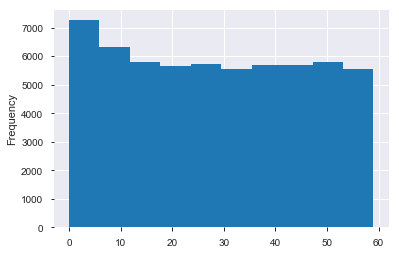

In [519]:
combo_X.external_data_provider_email_seen_before.replace([-999, -1], np.nan, inplace=True)
combo_X.external_data_provider_email_seen_before.plot('hist');
edpesb_nulls = combo_X.external_data_provider_email_seen_before.isnull().sum()
print('the number of NaN Values in the Var is', edpesb_nulls)

Por ter uma parência praticamente uniforme, e possuir uma quantidade razoavel de NaN's,farei a imputacao e usarei a moda como melhor representante médio da população.

In [520]:
def df_imputer (df,column_names, strat = 'mean', out = True):
    from sklearn.impute import SimpleImputer
    df = df.copy()
    imp = SimpleImputer(missing_values=np.NaN, strategy=strat)
    for feature in column_names:
        imputed = imp.fit_transform(df[[feature]])
        imputed_df = pd.DataFrame(imputed, columns = [feature+'_imp'])
        df = pd.concat([df,imputed_df],axis=1)
        df.drop(feature, axis = 1, inplace = out)
    return df

In [521]:
meanImp = ['n_accounts', 'risk_rate', 'score_3', 'n_issues']
medianImp = ['credit_limit', 'income', 'n_bankruptcies', 'n_defaulted_loans', 'reported_income']
modaImp = ["external_data_provider_email_seen_before"]

In [522]:
#combo_x.n_accounts.replace(np.nan, np.NaN, inplace=True)
combo_X_mea = df_imputer(combo_X, meanImp)
combo_X_med = df_imputer(combo_X_mea, medianImp, strat = 'median')
combo_X_imp = df_imputer(combo_X_med, modaImp, strat = 'most_frequent')

### Label Encoding

Por fim, criarei uma função para transformar as variáveis categóricas em labels a partir de seus níveis, identificadas em uma list comprehension feita em seguida, com o intuito de melhor analizá-las na próxima etapa, inclusive com target_default e target_fraud, construindo um DF apenas para elas.

In [523]:
# Função para geração das labels - ATÉ QUAL PONTO ESSE LABEL ENCODER CONTINUA ÚTIL??? SÓ TRANSFORMAR EM CAT PODE SER MELHOR COMO NÃO VOU OLHAR CAT EM FORMATO DE NUMEROS
def do_labelEncoding(df, columns, out = True):
    # Pacote utilizado para gerar as labels
    from sklearn.preprocessing import LabelEncoder
    df = df.copy()
    for column in columns:
        df[column+'_label'] = LabelEncoder().fit_transform(df[column].astype(str)) # Conversão necessária para funcionamento
        df[column+'_label'] = df[column+'_label'].astype('category') # vantagem - make the operations much faster than the object dtype
        df.drop(column, axis = 1, inplace = out) # drop da coluna antiga ou não
    return df

In [524]:
# Call da função
combo_X_clean = do_labelEncoding(combo_X_imp, catFeatures)

# Análise dos resultados
combo_X_clean.dtypes

index                                                       int64
score_4                                                   float64
score_5                                                   float64
score_6                                                   float64
last_amount_borrowed                                      float64
ok_since                                                  float64
application_time_in_funnel                                  int64
external_data_provider_fraud_score                          int64
n_accounts_imp                                            float64
risk_rate_imp                                             float64
score_3_imp                                               float64
n_issues_imp                                              float64
credit_limit_imp                                          float64
income_imp                                                float64
n_bankruptcies_imp                                        float64
n_defaulte

In [525]:
# Matriz só com as variáveis targets transformadas
target_label = do_labelEncoding(
    acquisition[['target_default', 'target_fraud']], ['target_default', 'target_fraud']
)

# Análise dos Resultados
target_label.dtypes

target_default_label    category
target_fraud_label      category
dtype: object

### Transformações das Variáveis Resposta

Spend:

Como o objetivo do trabalho inclui, também, qual será o limite inicial de um futuro cliente baseado em suas características, usarei os primeiros 3 meses de gastos de cada um dos clientes atuais como parâmetro de quanto um cliente gasta inicialmente na média.

In [526]:
# Agregação dos gastos médios nos primeiros 3 meses de cada cliente
pv_3m = spend.loc[spend.month < 3, :].groupby(['ids']).spends.mean()

# junção ao df inicial para transformação em df, com o mesmo index dos demais, e renomeação da variável
spend_y = acquisition[['ids']].join(pv_3m, on = 'ids', how = 'left')
spend_y.drop(['ids'], axis = 1, inplace = True)
spend_y.rename(index=str, columns={"spends": "pv_3m"}, inplace = True)
spend_y.reset_index(inplace=True, drop=True) # vale ressaltar esse passo como necessário para mudança do dtype do index

# EDA 

Assim como descrito acima, usarei as variáveis transformadas para facilitar a identificação de relações. À medida em que forem encontradas evidências ou relações interessantes, essas serão destrinchadas para melhor análise e compreensão usando os dados originais.

### Análise Univariada

Com a ajuda do pacote... faco a analise preliminar dos dados limpos

In [527]:
import pandas_profiling as pp
pp.ProfileReport(combo_X_clean[1:])

Number of variables,30
Number of observations,64029
Total Missing (%),0.0%
Total size in memory,10.0 MiB
Average record size in memory,163.1 B
Numeric,18
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,1


É interessante notar como boa partes das variáveis não possui uma correlação linear tão aparente, principalmente em relação aos gastos (possui correlação baixíssima com todas as variáveis), no entanto explorarei abaixo essas poucas correlações que se destacam procurando informações mais interessantes. Outro ponto muito interessante é correlação linear plena entre "n_issues" e "n_account", tornando a inclusão de ambas em um modelo inútil. Caso tivesse acesso à fonte de dados, seria extremamente importante investigar o porquê de tal acontecimento.

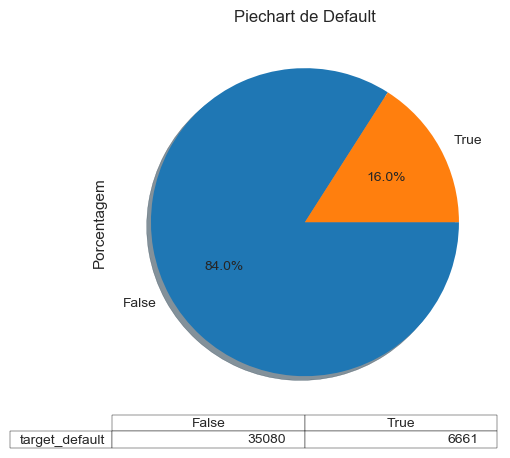

In [528]:
# Tamanho
plt.figure(figsize=(5,5))
# Plot
acquisition['target_default'].value_counts().plot(
    kind='pie', table=True, autopct='%1.1f%%', # Instruções usadas para gerar a porcentagem dentro do Piechart
    counterclock=False, shadow=True
);
# Atributos estéticos
plt.title('Piechart de Default')
plt.ylabel('Porcentagem');

É interessante notar o claro desbalanceamento entre as classes, já indicando que, talvez, acurácia não seja um dos melhores indicadores de qualidade do modelo, a menos que se consigam mais dados ou se use algum método de compensação como o SMOTE.

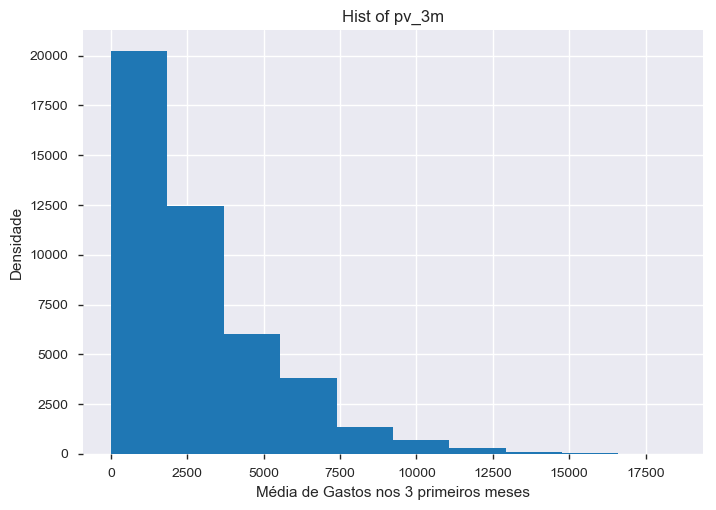

In [529]:
# Plot
spend_y.pv_3m.plot(kind = 'hist')

# Atributos estéticos
plt.title('Hist of pv_3m')
plt.xlabel('Média de Gastos nos 3 primeiros meses')
plt.ylabel('Densidade');

Assim como visto acima, percebe-se uma distribuição extremamente concentrada em valores menores com alta dispersão em valores maiores. Isso indica que a média não seria um representante tão fiel da amostra, e que uma transformações podem ser favoráveis ára normalização da distribuição, melhorando a performance de alguns algorítmos como a regressão linear.

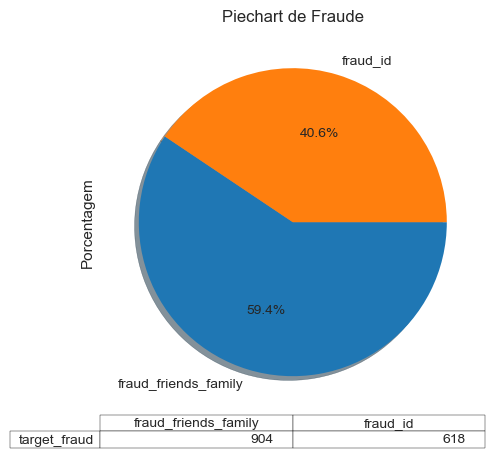

In [530]:
# Tamanho
plt.figure(figsize=(5,5))
# Plot
acquisition['target_fraud'].value_counts().plot(
    kind='pie', table=True, autopct='%1.1f%%', # Instruções usadas para gerar a porcentagem dentro do Piechart
    counterclock=False, shadow=True
);
# Atributos estéticos
plt.title('Piechart de Fraude')
plt.ylabel('Porcentagem');

Primeira característica reside no baixíssimo número de casos de fraudes em toda amostra. Em seguida, vamos que há uma proporção levemente maior dos casos propiciados por família e amigos. Considerando que mais de 90% da amostra é NaN, vou trabalhar com a hipótese de que esses valores são, na verdade, pessoas não consideradas como fraudulentas até o momento da extração dos dados.

### Análise Multivariada

Nesta seção, usaremos a matriz de correlações de Pearson para ter um primeiro olhar sobre as interações entre as variáveis e entender melhor como se relacionam. Para tal, usarei as variáveis alvo separadas no início e passá-las-ei pela mesma transformação dos dados explicativos, o intuito é tentar observar algumas correlações preliminares também.

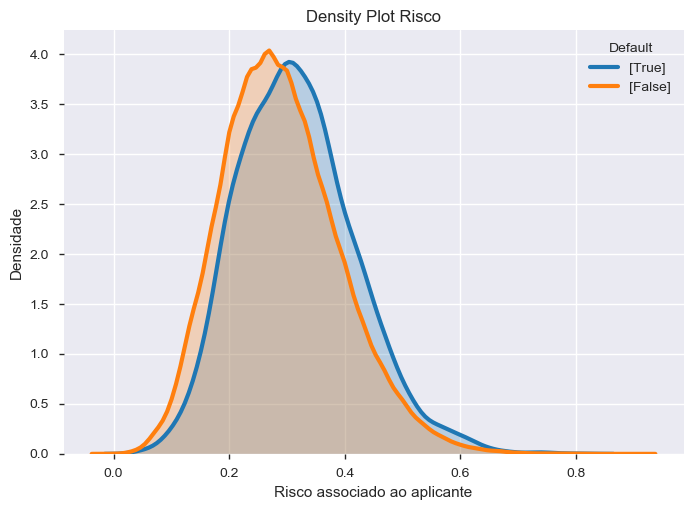

In [532]:
# Iteração com as variáveis
for feature in [True, False]:
    # Subset em relação a cada
    subset = acquisition[acquisition['target_default'] == feature]
    
    # density plot
    sns.distplot(
        subset['risk_rate'], hist = False, kde = True,
        kde_kws = {'shade': True, 'linewidth': 3},
        label = subset['target_default'].unique()
);
# Atributos
plt.legend(prop={'size': 10}, title = 'Default')
plt.title('Density Plot Risco')
plt.xlabel('Risco associado ao aplicante')
plt.ylabel('Densidade');

Primeiramente, vemos como a mediana da distribuição de risk_rate se altera levemente em relação a target_default

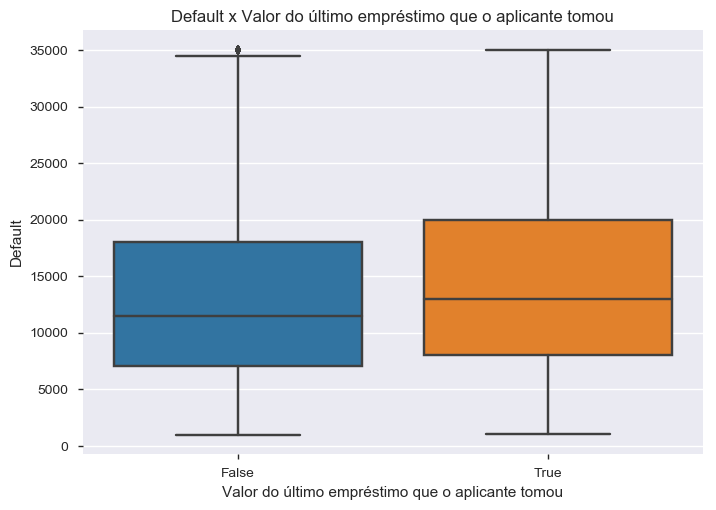

In [533]:
# Plot
sns.boxplot(y = 'last_amount_borrowed', x = 'target_default', data = acquisition);
# Atributos
plt.title('Default x Valor do último empréstimo que o aplicante tomou')
plt.xlabel('Valor do último empréstimo que o aplicante tomou')
plt.ylabel('Default');

Mesmo movimento encontrado em last_amount_borrowed, agora visto sob a perspectiva de boxplots.

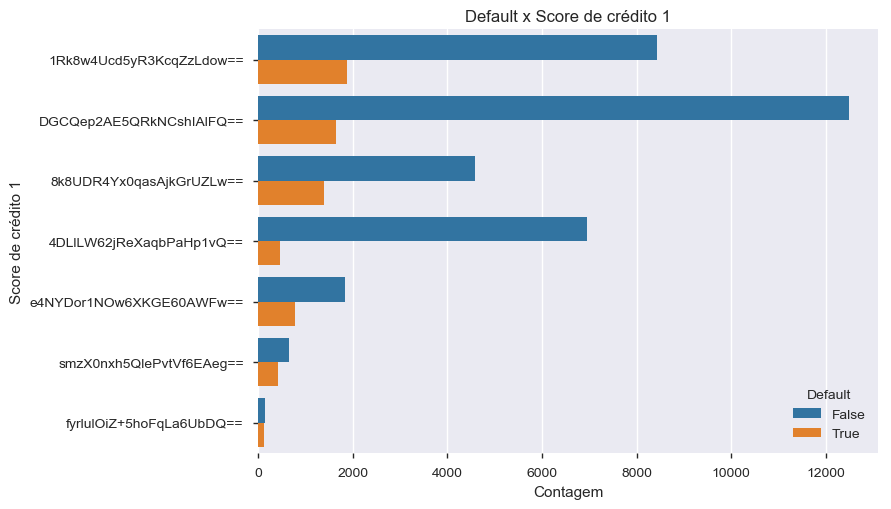

In [534]:
# Plot
sns.countplot(y = 'score_1', hue = 'target_default', data = acquisition);
# Atributos
plt.title('Default x Score de crédito 1')
plt.xlabel('Contagem')
plt.ylabel('Score de crédito 1')
plt.legend(prop={'size': 10}, title = 'Default');

Entre as variáveis categóricas mais correlacionadas com os Defaults, está score_1. Repare como, a depender da categoria, a proporção entre bons e maus pagadores varia razoavelmente.

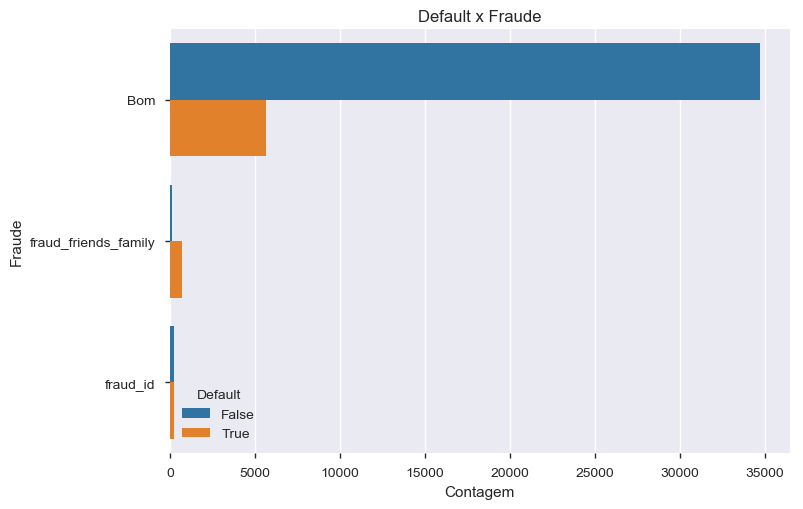

In [535]:
# Plot
sns.countplot(
    y = acquisition['target_fraud'].fillna('Bom'), hue = acquisition['target_default'] # modificação para ver NA's na plotagem
);
# Atributos
plt.title('Default x Fraude')
plt.xlabel('Contagem')
plt.ylabel('Fraude')
plt.legend(prop={'size': 10}, title = 'Default');

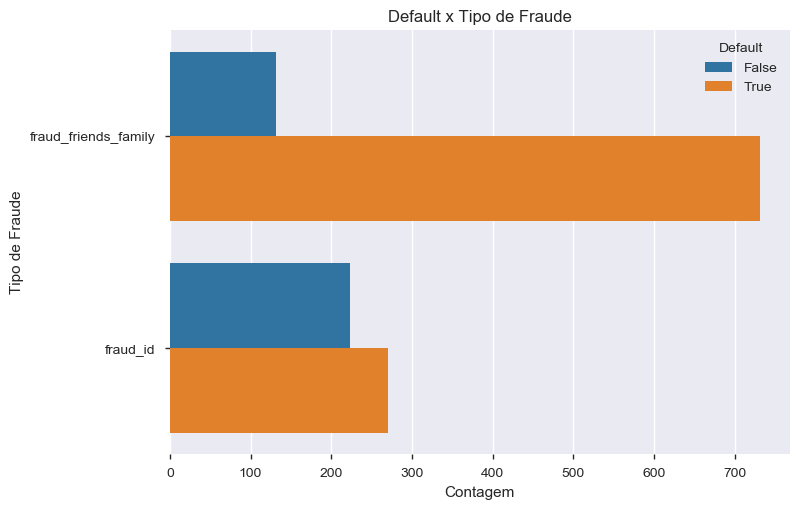

In [536]:
# Plot
sns.countplot(
    y = acquisition['target_fraud'], hue = acquisition['target_default'] # nesta, só se verá os casos de fraude
);
# Atributos
plt.title('Default x Tipo de Fraude')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Fraude')
plt.legend(prop={'size': 10}, title = 'Default');

Usei as duas plotagens para ver qual a proporção dos casos fraudulentos da amostra e, em seguida, qual a diferença entre os 2 casos de fraude encontrados. É notável como, além das detecções de fraude possuírem uma incidência maior de inadimplência, ela aumenta ainda maior de forma expressiva quando no casos de amigos e  família.

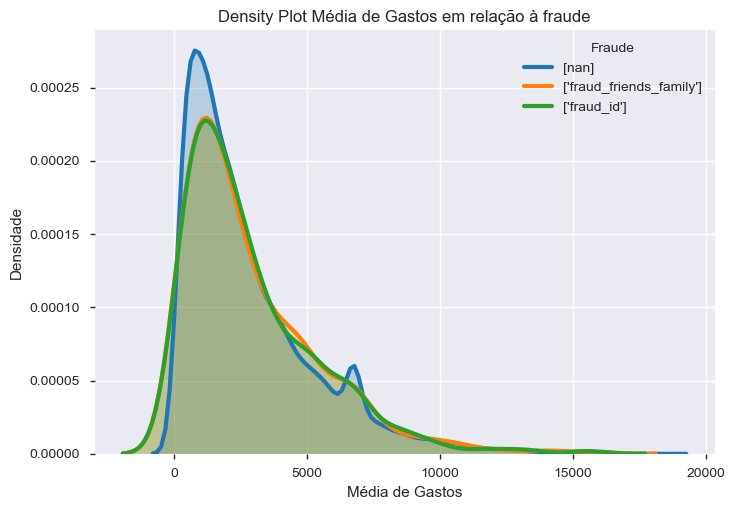

In [537]:
# Plot
# Iteração com as variáveis
for feature in total.target_fraud_label.unique():
    # Subset em relação a cada
    subset = total[total['target_fraud_label'] == feature]
    
    # density plot
    sns.distplot(
        subset['pv_3m'], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3},
        label = acquisition[total['target_fraud_label'] == feature].target_fraud.unique() # Resgata nomes originais
); 
# Atributos
plt.legend(prop={'size': 10}, title = 'Fraude')
plt.title('Density Plot Média de Gastos em relação à fraude')
plt.xlabel('Média de Gastos')
plt.ylabel('Densidade');

Embora haja pouca correlação linear, como visto no correlograma, é interessante ver a diferença na distribuição de probabilidade dos gastos iniciais em relação aos casos de fraude. Como aquela possui pouca correlação linear com a maioria das probabilidades, o achado pode demonstrar uma importância interessante desta como sinalizadora dos dois principais alvos do trabalho.

### Análise Multivariada

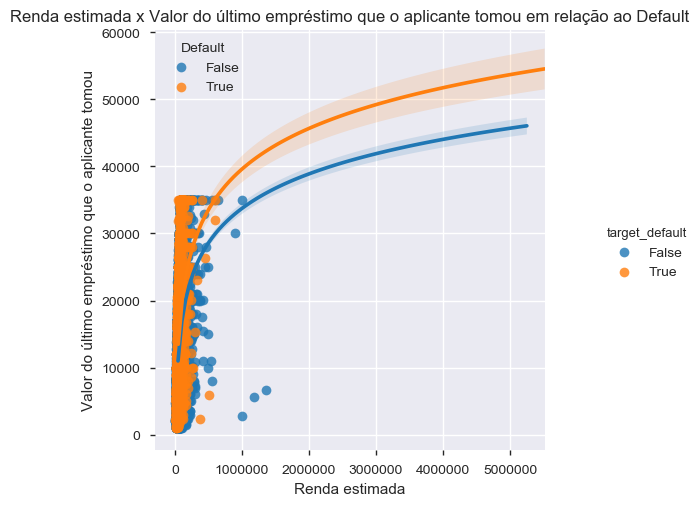

In [538]:
# Plot
sns.lmplot( 
    x="income", y="last_amount_borrowed", hue="target_default", data=acquisition,
    logx=True
);
# Atributos
plt.title('Renda estimada x Valor do último empréstimo que o aplicante tomou em relação ao Default')
plt.xlabel('Renda estimada')
plt.ylabel('Valor do último empréstimo que o aplicante tomou')
plt.legend(prop={'size': 10}, title = 'Default');

Ao se analisar a relação entre renda e tamanhos dos empréstimos tomados, percebe-se uma relação com tendência exponencial em que, quando comparada entre maus e bons pagadores, aqueles tomam empréstimos proporcionalmente maiores em relação à sua renda.

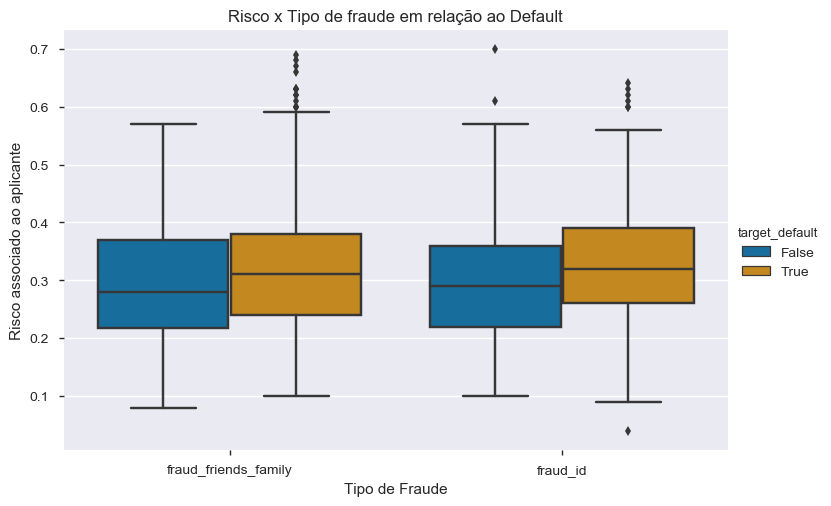

In [539]:
# Plot
sns.factorplot(
    x="target_fraud", y="risk_rate", hue="target_default", data=acquisition, # Features
    palette="colorblind", kind='box', size = 5, aspect = 1.5, legend_out=True # Tipo de gráfico, posição da legenda e cor
);
# Atributos
plt.title('Risco x Tipo de fraude em relação ao Default')
plt.xlabel('Tipo de Fraude')
plt.ylabel('Risco associado ao aplicante');

Neste, consegue-se visualizar, além da influência já sabida do tipo de fraude em relação ao risco de default, como há uma influência sutil na mudança na distribuição do risco associado ao aplicante.

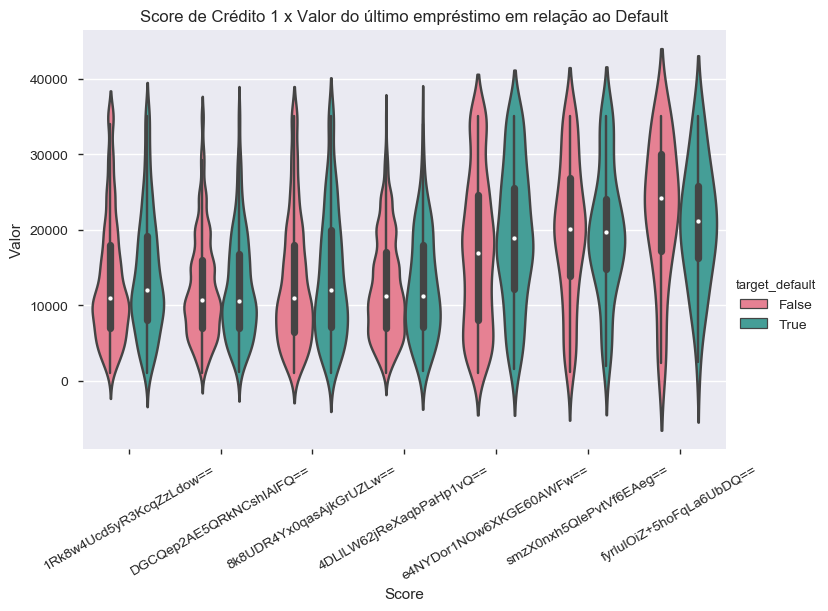

In [540]:
# Plot
sns.factorplot(
    x="score_1", y="last_amount_borrowed", hue="target_default", data=acquisition, # Features
    palette="husl", kind='violin', size = 5, aspect = 1.5, legend_out=True # Tipo de gráfico, posição da legenda e cor
).set_xticklabels(rotation=30); # configuração para rotacionar labels
# Atributos
plt.title('Score de Crédito 1 x Valor do último empréstimo em relação ao Default')
plt.xlabel('Score')
plt.ylabel('Valor');

Por fim, este gráfico é interessante para mostrar como a distribuição do valor se altera em relação ao score de crédito, e como o fato de o cliente dar calote ou não concentra a distribuição ao longo dos valores mais altos.

### Conclusões

A partir da análise exploratória, consegue-se notar como as variáveis disponíves possuem alguma correlação aparente com o risco de crédito, no entanto possuindo pouca influência para determinação da rotina inicial de gastos ou o risco de fraude. Obteve-se, graficamente, as correlações mais notáveis entre algumas variáveis, como entre o risco de crédito e score_1, risco associado, último valor emprestado por exemplo, e ainda interaçãos entre elas, usando-se a diferença na proporção entre renda e valor do último empréstimo e o efeito que isso aparenta no risco. Outra conclusão interessante reside no fato de o risco de fraude ser bem correlacionado com o risco de crédito e possuir influência considerável nos gastos inciais, assim pode ser interessante conseguir modelar o risco de fraude para auxiliar na obtenção dos objetivos principais do trabalho.

# Modelagem Estatística

Com todas as hipóteses formuladas, hora de testá-las para criar modelos eficazes na obtenção do objetivo. Para tal, usarei de 2 abordagens: uma primeira preliminar, em que farei um tratamento super simples com valores missing e verei a eficácia desses modelos (baseline); e uma segunda mais rebuscada, em que farei um estudo mais afundo dos missings, criarei novas variáveis a partir das antigas e farei uma seleção das mais eficaces para checar, em seguida, quais foram os ganhos em relação à abordagem mais simples.

### Preparação

Essa secao servira para criar modelo linear com o intuito de ter uma acuracia basica do modelo e excluir as primeiras variaveis, alem de excluir variaveis com quase zerovar

Funcao para executar o One Hot Encoding das variáveis

In [549]:
def oneHotEncoder (df, columns, out = True):
    for column in columns:
        ohe = pd.get_dummies(df[column],prefix=column,dummy_na=False, drop_first = False) # não sei ao certo se caga colocar true
        df = pd.concat([df,ohe],axis=1)
        df.drop(column, axis = 1, inplace = out)
    return df

In [550]:
# List comprehension to select categorical features 
oheFeatures = [feature for feature in combo_X_clean.columns if '_label' in feature]
# Function call and df transform
combo_x_ohe = oneHotEncoder(combo_X_clean, oheFeatures) 

Separação de Teste e Treino

In [554]:
# Separando os dados em teste e treino - ficar atento aqui, acho que 
X_treino = combo_x_ohe.loc[(combo_x_ohe['index'] < 45000), 'score_4':].reset_index(drop = True)
X_teste = combo_x_ohe.loc[(combo_x_ohe['index'] < 45000), 'score_4':].reset_index(drop = True)

Eliminação das variáveis com pouca variancia

### Preparação - Antigo, não mexer por hora

Antes de iniciar qualquer módulo, iniciarei alguns objetos comuns a todo o trabalho como a random seed, para garantir reproducibilidade, e a quantidade de validações cruzadas a serem usadas, 5, garantindo um número razoável de diferentes conjuntos de testes e validações.

In [556]:
# Garante que os resultados podem ser reproduzidos
seed = 666

# Quantidade de CV a serem usadas
#num_folds = 5

Como o trabalho de testar mais de um modelo usando algumas métricas de interesse pode ser repetitivo, criei uma função que automatiza todo o processo a partir de uma tupple de modelos definida, além de outros parâmetros com quantidade de cvs, o tipo de cv, métricas utilizadas, dentre outos. Essa função será de importante uso ao longo resto do projeto.

In [40]:
# Import do módulo
from sklearn import model_selection
from sklearn.metrics import roc_auc_score, mean_squared_error

## Função para comparação
def compara_cv_modelos (X, y, modelos, num_folds = num_folds, seed = seed, metrics = ['roc_auc'], Stratified = False):
    # Avaliando cada modelo
    resultados = []
    nomes = []
    
    for nome, modelo in modelos:
        if Stratified:
            kfold = model_selection.StratifiedKFold(n_splits = num_folds, random_state = seed)# stratified é necessário para class imbalance 
        else:
            kfold = model_selection.KFold(n_splits = num_folds, random_state = seed)
            
        
        for metric in metrics:
            cv_results = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = metric)
            resultados.append(cv_results)
            nomes.append(nome)
            msg = "%s - %s: %f (%f)" % (nome, metric, cv_results.mean(), cv_results.std())
            print(msg)

Abaixo, carrego e defino quais serão os algorítmos selecionados para montar as Tupples de  regressão e classificação. Cada um deles é baseado em um método (bayesiano, ensembled trees, Gradient Boosting) para testar qual possuirá melhor performance e aderência aos dados.

In [41]:
## Classificação

# Import dos módulos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC # só usarei quando houver menos dimensões, senão demora demais para treinar
from xgboost import XGBClassifier

# Preparando os modelo
modelos_cla = []
modelos_cla.append(('LR', LogisticRegression(multi_class='ovr')))
#modelos_cla.append(('LDA', LinearDiscriminantAnalysis()))
#modelos_cla.append(('NB', GaussianNB()))
#modelos_cla.append(('KNN', KNeighborsClassifier()))
modelos_cla.append(('RF', RandomForestClassifier()))
#modelos.append(('SVM', SVC()))
modelos_cla.append(('XGB', XGBClassifier()))

## Regressão
# Import dos módulos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import ElasticNet
#from sklearn.svm import SVC
from xgboost import XGBRegressor

# Preparando os modelo
modelos_reg = []
modelos_reg.append(('LR', LinearRegression()))
#modelos_reg.append(('EN', ElasticNet()))
#modelos_reg.append(('KNN', KNeighborsRegressor()))
modelos_reg.append(('RF', RandomForestRegressor()))
#modelos_reg.append(('SVM', SVC()))
modelos_reg.append(('XGB', XGBRegressor()))


Nos problemas de classificação, temos um desbalanceamento entre as classes, portanto usar apenas acurácia como métrica poderia ser enganoso, como sempre haverá um score alto de acertos: o problema reside nos falsos positivos e negativos. Para tal finalidade, incluí também 'neg_log_loss', para ponderar os erros pela probabilidade de certeza do algorítmo.
No problema de regressão, como a distribuição do target é muito desigual e com tendências logarítmicas, a média dos erros pode não oferecer o melhor panorama, assim usarei o 'r2', para se ter a noção da variação explicada pelo modelo; o 'neg_median_absolute_error', que oferecerá um representante mais próximo do erro mais comum às observações; e 'neg_mean_squared_log_error', para não desprezar o valor da média, porém a ponderando com as transformação logarítmica.

In [42]:
# Métricas de Classificação
metricas_cla = ['accuracy', 'neg_log_loss']
# Métricas de Regressão
metricas_reg = ['r2', 'neg_median_absolute_error', 'neg_mean_squared_log_error']

### Baseline - 2 - Preciso mudar o nome disto

Para fazer uma abodagem mais simples, não farei nenhuma alteração nas features além das imputações já realizadas e observar sa performance do modelo.

Risco de Crédito

Call da função com os parâmetros definidos acima. (lembrando do uso do índice construído no estudo dos missing eliminando as obs em que o target era NaN's)

In [44]:
# Function call
compara_cv_modelos (
    X_treino_bl.iloc[acq_idx,:], target_label[['target_default_label']].iloc[acq_idx,:], 
    modelos_cla, metrics = metricas_cla, Stratified = True
)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Usando os 3 modelos escolhidos, é inegável ver que o modelo que o melhor modelo em nossa abordagem inicial foi o XGBoost, assim escolhendo sua performance como referência.

Propensão a Gasto

Call da Função.

In [42]:
# Function call
compara_cv_modelos (
    X_treino_bl, spend_bl, modelos_reg, metrics = metricas_reg
)

LR - r2: -0.001026 (0.000520)
LR - neg_median_absolute_error: -1646.516512 (18.692049)
LR - neg_mean_squared_log_error: -1.249393 (0.014528)
RF - r2: -0.135647 (0.006402)
RF - neg_median_absolute_error: -1723.101600 (22.604958)
RF - neg_mean_squared_log_error: -1.349243 (0.018712)
XGB - r2: -0.004281 (0.001350)
XGB - neg_median_absolute_error: -1648.089935 (17.592111)
XGB - neg_mean_squared_log_error: -1.250767 (0.015175)


Aqui, diferentemente do visto acima, temos 2 modelos que performam de forma bem similar (XGB e LR), e o terceiro com uma r2 muito superior aos seus pares, embora todos os indicadores continuem baixos. Como abordagem, escolheirei o LR por possuir a maior quantidade de indicadores favoráveis.

### FE Models

### Risco de Fraude

Call da Função

In [66]:
# Function call
compara_cv_modelos (
    X_treino_bl, fraud_bl, modelos_cla, metrics = metricas_cla,
    Stratified = True
)

LR - accuracy: 0.964933 (0.000540)
LR - neg_log_loss: -1.097223 (0.000698)
RF - accuracy: 0.965822 (0.000192)
RF - neg_log_loss: -0.887721 (0.017224)
XGB - accuracy: 0.966178 (0.000084)
XGB - neg_log_loss: -0.156757 (0.001440)


### Normalização das Features numéricas

In [313]:
def do_scalling(df,column_names, out = True):
    from sklearn.preprocessing import StandardScaler
    df = df.copy()
    for feature in column_names:
        scaled = StandardScaler().fit_transform(df[[feature]])
        scaled_df = pd.DataFrame(scaled, columns = [feature+'_norm'])
        df = pd.concat([df,scaled_df],axis=1)
        df.drop(feature, axis = 1, inplace = True)
    return df

In [314]:
[feature for feature in combo_x_imp.columns.tolist() if feature not in catFeatures]

['index',
 'score_4',
 'score_5',
 'score_6',
 'last_amount_borrowed',
 'ok_since',
 'application_time_in_funnel',
 'external_data_provider_fraud_score',
 'n_accounts_imp',
 'risk_rate_imp',
 'score_3_imp',
 'credit_limit_imp',
 'income_imp',
 'n_bankruptcies_imp',
 'n_defaulted_loans_imp',
 'reported_income_imp',
 'external_data_provider_email_seen_before_imp']

In [315]:
combo_x_norm = do_scalling(combo_x_imp, [feature for feature in combo_x_imp.iloc[:,1:].columns.tolist() 
                                         if feature not in catFeatures])

### One Hot Encoding

In [317]:
combo_x_ohe = oneHotEncoder(combo_x_norm, catFeatures)

Separação em Dados de Teste e Treino

In [318]:
# Separando o array em componentes de input e output
idtrain = combo_x_ohe.loc[combo_x_ohe['index'] == 44999, :].index.tolist()
X_treino = combo_x_ohe.iloc[0:(idtrain[0]+1), 1:]
X_teste = combo_x_ohe.iloc[(idtrain[0]+1):, 1:]

In [154]:
combo_x_label = do_labelEncoding(combo_x_norm, catFeatures)

Agora, com todas as modificações incluídas, usarei os modelos com as melhores performances nas etapas iniciais, fazer a seleção das variáves mais explicativas, tunagem de hiperparâmetros, e observar sua performance nos dados de treino.

### Risco de Crédito

Retirada das observações com missing na variável target.

In [130]:
acquisition_fe_y.dropna(inplace = True)
X_treino_credit = X_treino.iloc[acquisition_fe_y.index, :]

Feature Selection

Optimal number of features : 124
Best features : Index(['application_time_in_funnel_norm', 'n_accounts_imp_norm',
       'score_3_imp_norm', 'income_imp_norm',
       'external_data_provider_email_seen_before_imp_norm',
       'score_1_1Rk8w4Ucd5yR3KcqZzLdow==', 'score_1_4DLlLW62jReXaqbPaHp1vQ==',
       'score_1_8k8UDR4Yx0qasAjkGrUZLw==', 'score_1_DGCQep2AE5QRkNCshIAlFQ==',
       'score_1_e4NYDor1NOw6XKGE60AWFw==',
       ...
       'shipping_state_BR-MT', 'shipping_state_BR-PA', 'shipping_state_BR-PB',
       'shipping_state_BR-PR', 'shipping_state_BR-RO', 'shipping_state_BR-RR',
       'shipping_state_BR-RS', 'shipping_state_BR-SC', 'shipping_state_BR-SE',
       'shipping_state_BR-SP'],
      dtype='object', length=124)


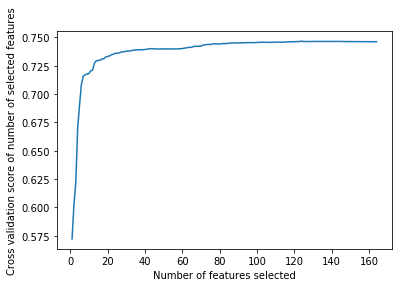

In [195]:
from sklearn.feature_selection import RFECV
model = LogisticRegression()

rfecv = RFECV(estimator=model, step=1, cv=num_folds,scoring='roc_auc')  
rfecv = rfecv.fit(X_treino_credit, acquisition_fe_y)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_treino_credit.columns[rfecv.support_])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Otimização dos hiperparâmetros

In [197]:
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

param_xgb = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

In [256]:
gsearch1 = model_selection.RandomizedSearchCV(XGBClassifier(), param_xgb, n_iter=10,
                            n_jobs=2, verbose=0, cv=num_folds,
                            scoring='roc_auc',random_state=seed)

gsearch1 = gsearch1.fit(X_treino_credit.iloc[:, rfecv.support_], acquisition_fe_y)
gsearch1.best_params_, gsearch1.best_score_

({'colsample_bytree': 0.9925672460769812,
  'gamma': 2.764625052041608,
  'learning_rate': 0.23703419831067118,
  'max_depth': 22,
  'min_child_weight': 49.2290844643288,
  'n_estimators': 30,
  'reg_alpha': 15.621271381242193,
  'subsample': 0.8182085933460475},
 0.7496426202609764)

Performance do modelo nos dados.

In [255]:
xgb = XGBClassifier(**gsearch1.best_params_)
xgb = xgb.fit(X_treino_credit.iloc[:, rfecv.support_], acquisition_fe_y)
# Compute predicted probabilities: y_pred_prob
y_pred_prob = xgb.predict_proba(X_treino_credit.iloc[:, rfecv.support_])[:,1]
# Compute and print AUC score
msg = "%s: %f" % ('XGB', roc_auc_score(acquisition_fe_y, y_pred_prob))
print(msg)

XGB: 0.761479


### Propensão a Gasto

Feature Selection.

Optimal number of features : 164
Best features : Index(['score_4_norm', 'score_5_norm', 'score_6_norm',
       'last_amount_borrowed_norm', 'ok_since_norm',
       'application_time_in_funnel_norm',
       'external_data_provider_fraud_score_norm', 'n_accounts_imp_norm',
       'risk_rate_imp_norm', 'score_3_imp_norm',
       ...
       'shipping_state_BR-PE', 'shipping_state_BR-PR', 'shipping_state_BR-RN',
       'shipping_state_BR-RO', 'shipping_state_BR-RR', 'shipping_state_BR-RS',
       'shipping_state_BR-SC', 'shipping_state_BR-SE', 'shipping_state_BR-SP',
       'shipping_state_BR-TO'],
      dtype='object', length=164)


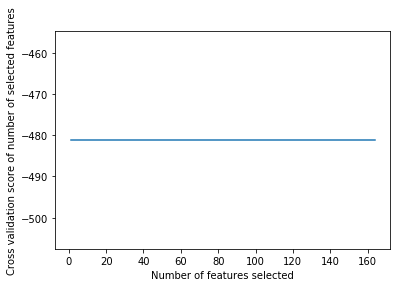

In [321]:
model2 = ElasticNet()

rfecv2 = RFECV(estimator=model2, step=1, cv=num_folds,scoring='neg_mean_squared_error')  
rfecv2 = rfecv2.fit(X_treino, spend_fe_y_sqr)
print('Optimal number of features :', rfecv2.n_features_)
print('Best features :', X_treino.columns[rfecv2.support_])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv2.grid_scores_) + 1), rfecv2.grid_scores_)
plt.show()

Otimização dos hiperparâmetros.

In [322]:
param_en = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [323]:
gsearch2 = model_selection.RandomizedSearchCV(ElasticNet(), param_en, n_iter=10,
                            n_jobs=2, verbose=0, cv=num_folds,
                            scoring='neg_mean_squared_error',random_state=seed)

gsearch2 = gsearch2.fit(X_treino.iloc[:, rfecv2.support_], spend_fe_y_sqr)
gsearch2.best_params_, gsearch2.best_score_

({'max_iter': 5, 'l1_ratio': 0.5, 'alpha': 10}, -481.13673848722317)

Performance do modelo nos dados.

In [324]:
en = ElasticNet(**gsearch2.best_params_)
en = en.fit(X_treino.iloc[:, rfecv2.support_], spend_fe_y_sqr)
# Compute predicted probabilities: y_pred_prob
y_pred_prob2 = en.predict(X_treino.iloc[:, rfecv2.support_])
# Compute and print AUC score
msg2 = "%s: %f" % ('EN', mean_squared_error((spend_fe_y_sqr**2), (y_pred_prob2**2)))
print(msg2)

EN: 6278564.363158


### Risco de Fraude

Feature Selection

Optimal number of features : 123
Best features : Index(['application_time_in_funnel_norm', 'income_imp_norm',
       'external_data_provider_email_seen_before_imp_norm',
       'score_1_1Rk8w4Ucd5yR3KcqZzLdow==', 'score_1_4DLlLW62jReXaqbPaHp1vQ==',
       'score_1_DGCQep2AE5QRkNCshIAlFQ==', 'score_1_fyrlulOiZ+5hoFqLa6UbDQ==',
       'score_1_smzX0nxh5QlePvtVf6EAeg==', 'score_2_+CxEO4w7jv3QPI/BQbyqAA==',
       'score_2_5/uMrqKj3OL/Xk5OrGx9fg==',
       ...
       'shipping_state_BR-PE', 'shipping_state_BR-PR', 'shipping_state_BR-RN',
       'shipping_state_BR-RO', 'shipping_state_BR-RR', 'shipping_state_BR-RS',
       'shipping_state_BR-SC', 'shipping_state_BR-SE', 'shipping_state_BR-SP',
       'shipping_state_BR-TO'],
      dtype='object', length=123)


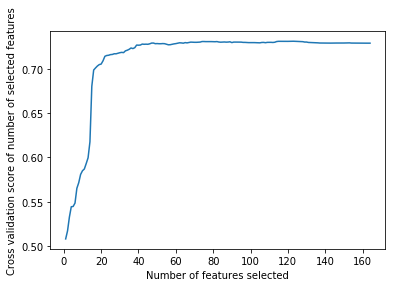

In [242]:
rfecv3 = RFECV(estimator=model, step=1, cv=num_folds,scoring='roc_auc')  
rfecv3 = rfecv3.fit(X_treino, fraud_fe_y)
print('Optimal number of features :', rfecv3.n_features_)
print('Best features :', X_treino.columns[rfecv3.support_])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv3.grid_scores_) + 1), rfecv3.grid_scores_)
plt.show()

Otimização dos hiperparâmetros

In [259]:
gsearch3 = model_selection.RandomizedSearchCV(XGBClassifier(), param_xgb, n_iter=10,
                            n_jobs=2, verbose=0, cv=num_folds,
                            scoring='neg_log_loss',random_state=seed)

gsearch3 = gsearch3.fit(X_treino.iloc[:, rfecv3.support_], fraud_fe_y)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.9925672460769812,
  'gamma': 2.764625052041608,
  'learning_rate': 0.23703419831067118,
  'max_depth': 22,
  'min_child_weight': 49.2290844643288,
  'n_estimators': 30,
  'reg_alpha': 15.621271381242193,
  'subsample': 0.8182085933460475},
 -0.1341643777066558)

Performance do modelo nos dados.

In [270]:
msg2 = "%s: %f" % ('EN', mean_squared_error((spend_fe_y_sqr**2), (y_pred_prob2**2)))

In [260]:
from sklearn.metrics import log_loss

xgb2 = XGBClassifier(**gsearch3.best_params_)
xgb2 = xgb2.fit(X_treino.iloc[:, rfecv3.support_], fraud_fe_y)
# Compute predicted probabilities: y_pred_prob
y_pred_prob3 = xgb2.predict_proba(X_treino.iloc[:, rfecv3.support_])[:,1]
# Compute and print AUC score
msg3 = "%s: %f" % ('XGB', log_loss(fraud_fe_y, y_pred_prob3))
print(msg3)

XGB: 0.132282


Com exceção do Risco de fraude, os modelos demonstraram, por incrível que pareça, uma piora de performance após todas as alterações. Por fim, usarei os modelos com melhor desempenho para realizar as previsões finais.

# Feature Importance

A seguir, farei a plotagem das features que tiveram mais influência na determinação dos resultados.

Risco de Crédito

In [197]:
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

param_xgb = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

In [262]:
xgb_bl = XGBClassifier().fit(X_bl_treino_credit, acquisition_bl_y) 

                                          importance
feature                                             
score_1_label                                  0.149
income                                         0.086
external_data_provider_email_seen_before       0.081
facebook_profile_label                         0.081
score_3                                        0.068
last_borrowed_in_months_label                  0.059
last_amount_borrowed                           0.055
risk_rate                                      0.055
score_2_label                                  0.055
n_issues                                       0.049
application_time_in_funnel                     0.043
credit_limit                                   0.035
marketing_channel_label                        0.028
score_4                                        0.021
n_accounts                                     0.018
ok_since                                       0.016
email_label                                   

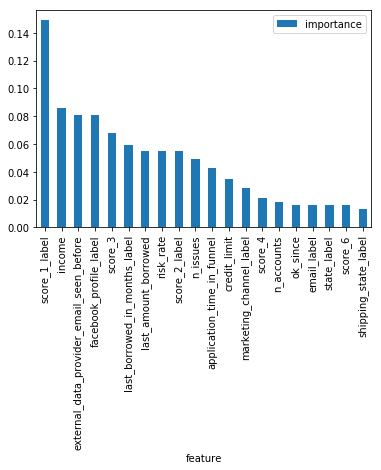

In [263]:
importances_credit = pd.DataFrame({'feature':X_bl_treino_credit.columns,'importance':np.round(xgb_bl.feature_importances_,3)})
importances_credit_top = importances_credit.sort_values('importance',ascending=False).set_index('feature').head(n=20)

print(importances_credit_top)
importances_credit_top.plot.bar()

Propensão a Gastos

In [325]:
en_bl = ElasticNet().fit(X_bl_treino, spend_bl_y)

                                                    importance
feature                                                       
external_data_provider_credit_checks_last_year_...      13.821
facebook_profile_label                                  12.616
n_accounts                                               4.256
n_defaulted_loans                                        3.533
real_state_label                                         2.896
email_label                                              2.525
risk_rate                                                1.515
score_4                                                  1.153
state_label                                              0.760
score_6                                                  0.756
score_2_label                                            0.285
n_issues                                                 0.270
ok_since                                                 0.184
score_3                                                

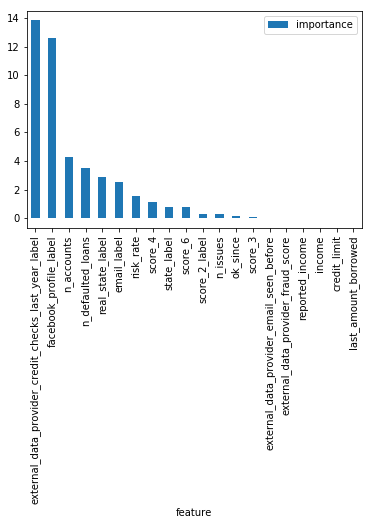

In [326]:
importances_s = pd.DataFrame({'feature':X_bl_treino.columns,'importance':np.round(en_bl.coef_,3)})
importances_s_top = importances_s.sort_values('importance',ascending=False).set_index('feature').head(n=20)

print(importances_s_top)
importances_s_top.plot.bar()

Risco de Fraude

                                                   importance
feature                                                      
external_data_provider_email_seen_before_imp_norm       0.208
application_time_in_funnel_norm                         0.104
score_1_4DLlLW62jReXaqbPaHp1vQ==                        0.094
marketing_channel_Website                               0.083
facebook_profile_True                                   0.073
email_gmail.com                                         0.073
shipping_state_BR-RR                                    0.062
shipping_state_BR-MG                                    0.062
score_1_DGCQep2AE5QRkNCshIAlFQ==                        0.052
shipping_state_BR-SP                                    0.031
email_spgov.com                                         0.031
email_hotmail.com                                       0.031
income_imp_norm                                         0.031
facebook_profile_False                                  0.021
last_bor

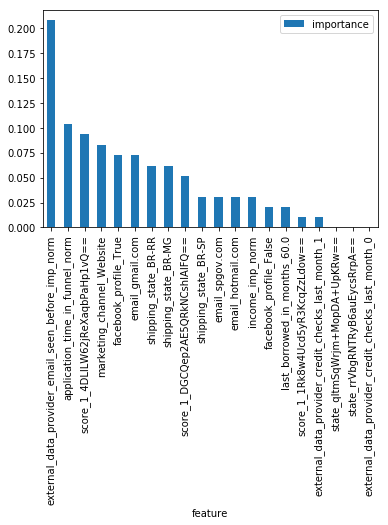

In [274]:
importances_f = pd.DataFrame({'feature':X_treino.iloc[:, rfecv3.support_].columns,'importance':np.round(xgb2.feature_importances_,3)})
importances_f_top = importances_f.sort_values('importance',ascending=False).set_index('feature').head(n=20)

print(importances_f_top)
importances_f_top.plot.bar()

Interessante notar como, da mesma maneira que visto na análise exploratória, score_1 possui uma boa influência em relação à tendência do indivíduo realizar um default ou não.

# Submissões

Após todas as análises e modificações, criarei os csv's com as predições de cada modelos.

In [329]:
idT = teste.ids

Risco de Crédito

In [348]:
sub_acq = pd.DataFrame()
sub_acq['ids'] = idT
sub_acq['target_default'] = xgb_bl.predict_proba(X_bl_teste)[:,1]
sub_acq.to_csv('target_default.csv', index=False)

Propensão a Gastos

In [347]:
sub_spend = pd.DataFrame()
sub_spend['ids'] = idT
sub_spend['spends'] = en_bl.predict(X_bl_teste)
sub_spend.to_csv('spends.csv', index=False)

Risco de Fraude

In [352]:
sub_fraud = pd.DataFrame()
sub_fraud['ids'] = idT
sub_fraud['target_fraud'] = xgb2.predict_proba(X_teste.iloc[:, rfecv3.support_])[:,1]
sub_fraud.to_csv('target_fraud.csv', index=False)